# Task 3


In [135]:
w0, w1, w2 = 1, 0, 1
g0,g1,g2 = 0,0,0
w0_best, w1_best, w2_best = w0, w1, w2


In [136]:
t0,t1,t2 = 1,0,1

x1, x2, y = [], [], []
check_x1,check_x2,check_x3 = [],[],[]

In [137]:
import pandas as pd
import random
import numpy as np
import math

N random points are produced for the specified linear separator w.

In [138]:
def generate_pla(N,name,w0=0,w1=1,w2=1):
    n = 0
    X1 = []
    X2 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-10,10)
        y_step = w0 + w1*x1 + w2*x2
        if(y_step == 0):
            continue
        X1.append(x1)
        X2.append(x2)
        if(y_step > 0):
            Y.append(1)
        elif(y_step < 0):
            Y.append(-1)
        n += 1
    data = [np.array([1,X1[i],X2[i],Y[i]]) for i in range(N)]
    df = pd.DataFrame(data)
    df.drop([0], axis = 1, inplace=True)
    df.columns = ['x1', 'x2', 'y']

    df.to_csv(name, index=False)
    return data

f_w0, f_w1, f_w2 = 1, 1, 1
generate_pla(100,'synthetic_dataset.csv', f_w0, f_w1, f_w2)
generate_pla(10000,'synthetic_dataset_test.csv', f_w0, f_w1, f_w2)


[array([ 1.        , -2.48086689, -4.86381729, -1.        ]),
 array([ 1.        , -8.81951747, -6.62723963, -1.        ]),
 array([ 1.        , -1.79448388, -4.56096712, -1.        ]),
 array([ 1.        , -7.45477708,  4.85055937, -1.        ]),
 array([1.        , 9.33259439, 4.45984113, 1.        ]),
 array([ 1.        , -1.23317198,  5.59170557,  1.        ]),
 array([1.        , 1.54899674, 7.21597829, 1.        ]),
 array([ 1.        , -6.34478286,  9.83724472,  1.        ]),
 array([ 1.        ,  7.89456311, -1.10130116,  1.        ]),
 array([ 1.        , -5.89690868, -8.60869597, -1.        ]),
 array([1.        , 1.00956559, 3.184146  , 1.        ]),
 array([ 1.        ,  5.73224593, -6.72613183,  1.        ]),
 array([ 1.        , -7.59782719, -1.50881133, -1.        ]),
 array([ 1.        , -7.11882259,  6.43435279,  1.        ]),
 array([1.        , 9.39780168, 8.80740203, 1.        ]),
 array([ 1.        , -4.00237197,  5.27921346,  1.        ]),
 array([1.        , 8.39

Read file function

In [139]:
def readFile(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(float(values[2]))
    return x1,x2,y



Read file function for test / try cases

In [140]:
def readFile_test(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1_test.append(float(values[0]))
            x2_test.append(float(values[1]))
            y_test.append(float(values[2]))
    return x1_test,x2_test,y_test

In [141]:
def misclassified():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]



In [142]:

def PLA(n, weight_limit=1e30):
    global w0, w1, w2
    for iteration in range(1000):
        misclassified = misclassified_points()
        if not misclassified:
            break

        for x1_misclassified, x2_misclassified, y_misclassified in misclassified:
            signal = w0 + w1 * x1_misclassified + w2 * x2_misclassified
            if y_misclassified * signal <= 1:
                w0 += n * (y_misclassified - signal)
                w1 += n * (y_misclassified - signal) * x1_misclassified
                w2 += n * (y_misclassified - signal) * x2_misclassified

        if abs(w0) > weight_limit or abs(w1) > weight_limit or abs(w2) > weight_limit:
            print("weights approaching infinity so update is termninated")
            break

In [143]:
def calErrorPercen(x1_test, x2_test, y_test, w0, w1, w2):
    num_samples = len(x1_test)
    misclassified = 0

    for i in range(num_samples):
        x1_sample, x2_sample = x1_test[i], x2_test[i]
        signal = w0 + w1 * x1_sample + w2 * x2_sample

        prediction = 1 if signal >= 0 else -1

        if prediction != y_test[i]:
            misclassified += 1

    error_percentage = (misclassified / num_samples) * 100.0
    return error_percentage


In [144]:
import matplotlib.pyplot as plt

extracting the data 

In [145]:
file_read('synthetic_dataset.csv')
file_read_test('synthetic_dataset_test.csv')


([-4.889076326731001,
  -2.683146322781031,
  -1.9459724688615694,
  -8.47898497824336,
  -6.974705224326678,
  -0.42272612935978415,
  -3.33639844918884,
  -7.708054646723821,
  7.901626049855814,
  -0.4260800219361087,
  7.11188341374779,
  -6.891080914165095,
  9.727352753702668,
  -3.3833809993077946,
  -0.7202734950477119,
  -2.6418380651725926,
  -6.172808808711747,
  -5.52815590649542,
  -7.653023027079053,
  -6.737717515604242,
  1.7906722889771096,
  -0.4439811538182248,
  -9.351673037586519,
  -9.260714787279738,
  6.459705317519283,
  0.7410655790454541,
  -8.896286199624415,
  -9.498826733101716,
  7.478493561494357,
  0.10289811783336056,
  0.026634386862205872,
  2.4878178993780544,
  -3.392274618217339,
  4.480570706856193,
  -1.2729524209602605,
  5.131361384117252,
  -9.159936764594665,
  -2.4490366510096866,
  6.2382759636404295,
  -3.940843335021393,
  8.174211901357019,
  7.492925549247865,
  1.381623119009518,
  7.381880693850352,
  -6.116288980301303,
  9.46079836

# QA)

when n = 100

In [146]:
PLA(100)


weights approaching infinity so update is termninated


Weights obtained for n = 100 --> w0:  6.345650719197057e+33    w1: -1.588999827693707e+33    w2:  4.911898040307236e+33
Error Percentage on Test Data: 33.34%


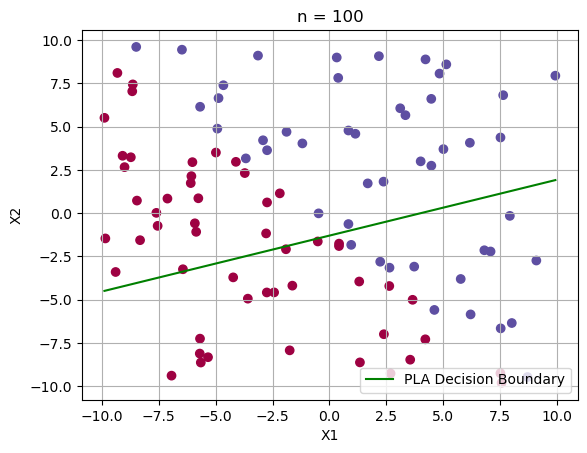

In [147]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)
x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('n = 100')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 100 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calErrorPercen(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()

# QB)

when n = 1

In [148]:
w0, w1, w2 = 1, 0, 1
PLA(1)


weights approaching infinity so update is termninated


Weights obtained for n = 1 --> w0:  1.1445577631440906e+30    w1: 2.4720016987179408e+30    w2:  9.51920775496647e+30
Error Percentage on Test Data: 18.79%


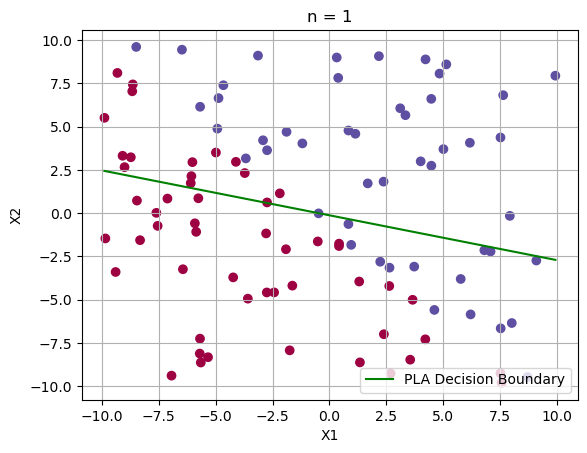

In [149]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('n = 1')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 1 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calErrorPercen(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()

# QC)

when n = 0.01

In [150]:
w0, w1, w2 = 1, 0, 1
PLA(0.01)


Weights obtained from n = 0.01 --> w0:  0.9647244905433668    w1: 1.0729210149721684    w2:  0.9803209461450759
Error Percentage on Test Data: 2.08%


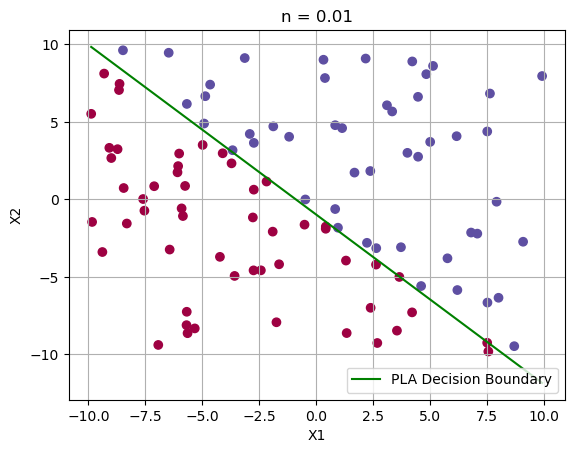

In [151]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('n = 0.01')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from n = 0.01 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calErrorPercen(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()

# QD)


when n = 0.0001

In [152]:
w0, w1, w2 = 1, 0, 1
PLA(0.0001)


Weights obtained for n = 0.0001 --> w0:  0.7732265922906789    w1: 0.7079946611233822    w2:  0.6708629917675462
Error Percentage on Test Data: 1.28%


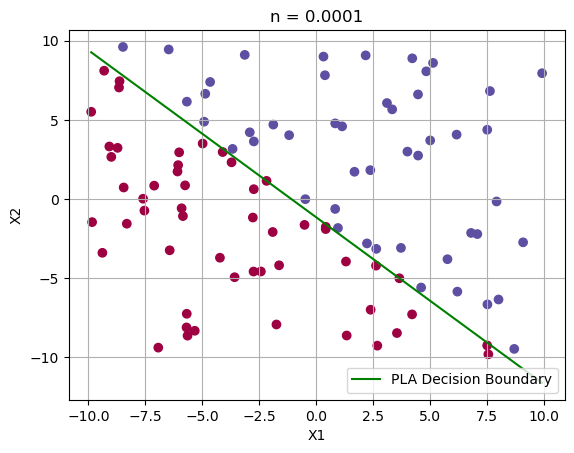

In [153]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('n = 0.0001')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained for n = 0.0001 -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
error_percentage = calErrorPercen(x1_test, x2_test, y_test, w0, w1, w2)
print(f"Error Percentage on Test Data: {error_percentage:.2f}%")
plt.show()


# QE)


Here, the learning rate is represented by the n value. A high learning rate suggests that the weights converge more quickly, but it also makes the system more error-prone since each update shifts the line by a sizable amount. We can see this for the learning rate values of 100 and 1. The incremental updates for each weight are much more accurate when we lower the learning rate to 0.01 and 0.0001, and with the correct number of iterations, we will converge at the perfect weight value. We can see that the least mistake % is acquired at lower learning rates when we use 1000 iterations for this issue. Lower iterations might not show the same thing. However, we will typically obtain the lowest error rate with higher iterations and lower learning rates.